## A boilerplat for doing Supervised Macine Learning [Enter the Topic of your study here]

### 1. [Enter your business questions here]
ex: We will use **supervised** machine learning to **binary classifiy** whether an individual will default on his loan or not

### Preliminary
we will load all the required libraries here

In [1]:
# the basics
import numpy as np
import pandas as pd
from datetime import datetime   # note: good for dealing with time series
import time                     # note: good for clocking computation time between difference models

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Algorithms: Import your model of choice here! Or comment out what you don't need
#from sklearn import linear_model
#from sklearn.svm import SVR
#from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDRegressor, SGDClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier,  GradientBoostingClassifier
#from xgboost import XGBRegressor, XGBClassifier

# Model Evaluation
from sklearn.model_selection import cross_val_score                           # Prevent Overfitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # regression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score  # classification

# Hyper-parameters tuning
from sklearn.model_selection import GridSearchCV

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 2. Data
Write a summary of how the data is obtained

In [5]:
fname = 'data/loan_data.csv'
data = pd.read_csv( fname, 
                  #index_col = 0
                  )

take a look at the data

In [12]:
data.head(10)

,credit.policy,purpose,int_rate,installment,log_annual_income,dti,fico,cr_line_days,revol_balance,revol_util_rate,inq_l6m,delinq_count_2y,pub_rec,is_default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [7]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [21]:
data.describe()

,credit.policy,int_rate,installment,log_annual_income,dti,fico,cr_line_days,revol_balance,revol_util_rate,inq_l6m,delinq_count_2y,pub_rec,is_default
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Check for missing data

Text(176,0.5,'missing data')

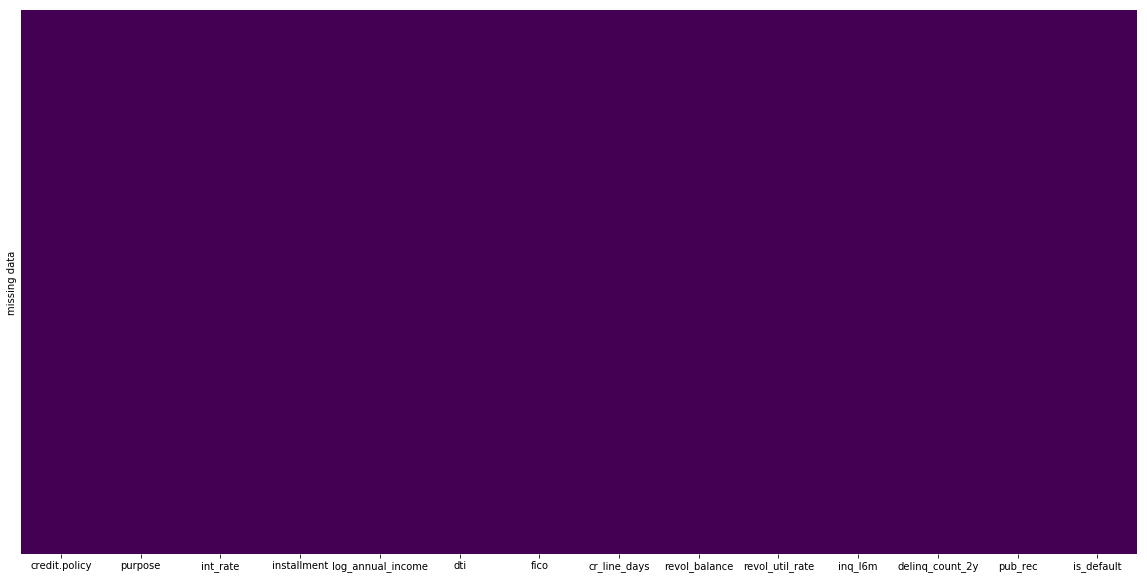

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.ylabel('missing data')

#### Renaming Columns
as required

In [9]:
data = data.rename(
        columns = {
            'int.rate': 'int_rate',
            'log.annual.inc': 'log_annual_income',
            'days.with.cr.line': 'cr_line_days',
            'revol.bal': 'revol_balance',
            'revol.util': 'revol_util_rate',
            'inq.last.6mths': 'inq_l6m',
            'delinq.2yrs': 'delinq_count_2y',
            'pub.rec': 'pub_rec',
            'not.fully.paid': 'is_default'
        }
    )

#### Check for duplicates

In [11]:
# Enter the combo of columns that should be unique here:
l_dup_check = ['int_rate',
               'log_annual_income'
              ]

data_dup = data[
            data.duplicated( 
                #subset = l_dup_check, 
                keep = False)
            ]
print( f' Found { len ( data_dup )} duplicated records.')

if len(data_dup)> 0:
    data_dup.head(10)

 Found 0 duplicated records.


### 3. Exploratory Data Analysis
visualize and understand your data!

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


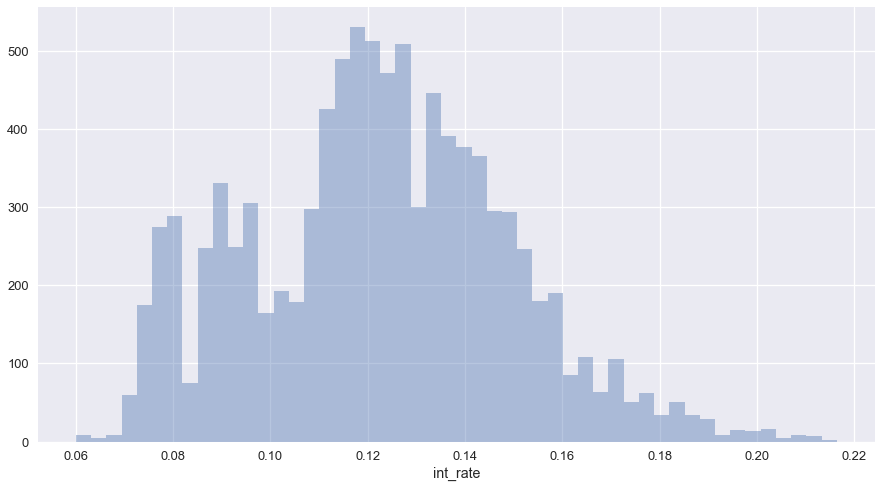

In [15]:
plt.figure( figsize = (15, 8))
sns.set(style = 'darkgrid', context = 'talk')
g = sns.distplot( 
            data['int_rate'],
            kde = False, bins = 50
        )

#g.set_title('')
#g.legend(loc='upper right')

Text(0.5,1,'Log_annual_income by Loan Purpose')

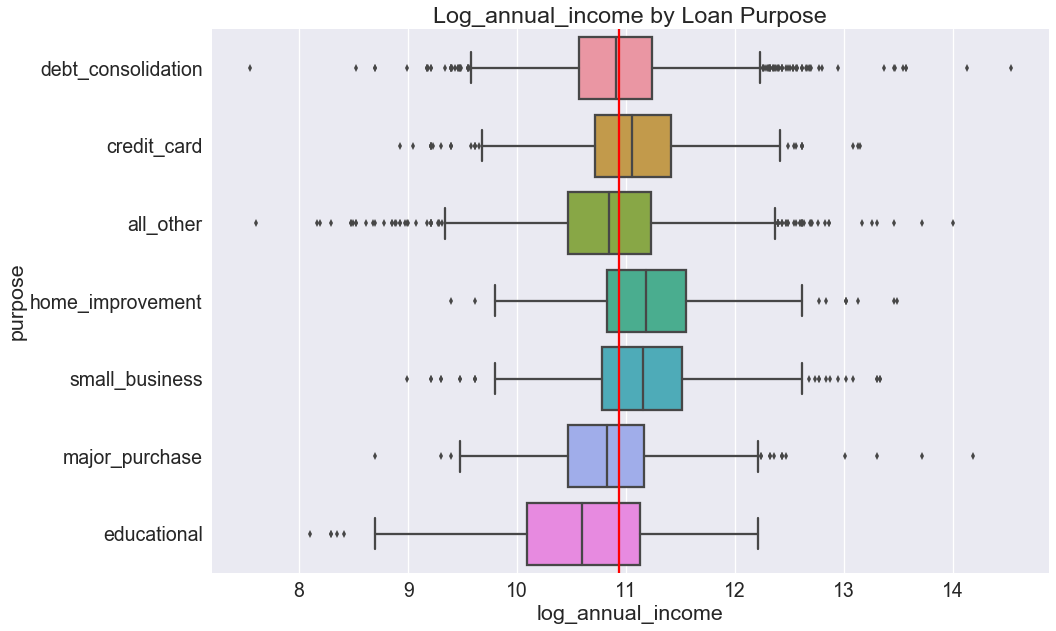

In [18]:
plt.figure(figsize = (15,10))
sns.set(style = 'darkgrid', context = 'talk', font_scale= 1.5)
g = sns.boxplot(x ='log_annual_income', y = 'purpose', data = data )

mean_price = data.log_annual_income.mean()
g.vlines( mean_price, g.get_ylim()[0], g.get_ylim()[1], color = 'r')
g.set_title('Log_annual_income by Loan Purpose')

# for label in g.get_xticklabels():
#     label.set_rotation(90)

Text(0.5,1,'Revolving balance vs Debt-to-income')

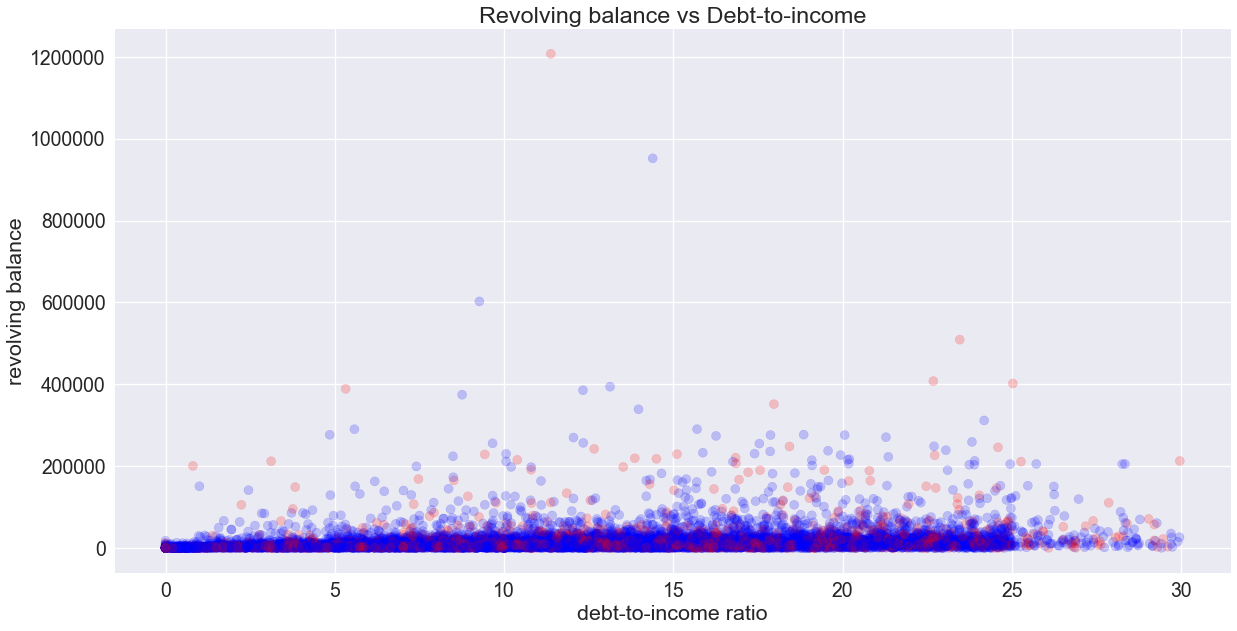

In [22]:
color_dict = { 0: 'blue',  1: 'red'}

plt.figure(figsize = (20,10))
plt.scatter (
    x = data['dti'],
    y = data['revol_balance'],
    c = data['is_default'].apply( lambda x: color_dict[x]),
    alpha = 0.2
)
plt.ylabel('revolving balance')
plt.xlabel('debt-to-income ratio')
plt.title( 'Revolving balance vs Debt-to-income')

#### Pair Plot
use this to see relationships between the features and maybe we can remove features that are highly correlated with another feature

In [24]:
data.columns

Index(['credit.policy', 'purpose', 'int_rate', 'installment',
       'log_annual_income', 'dti', 'fico', 'cr_line_days', 'revol_balance',
       'revol_util_rate', 'inq_l6m', 'delinq_count_2y', 'pub_rec',
       'is_default'],
      dtype='object')

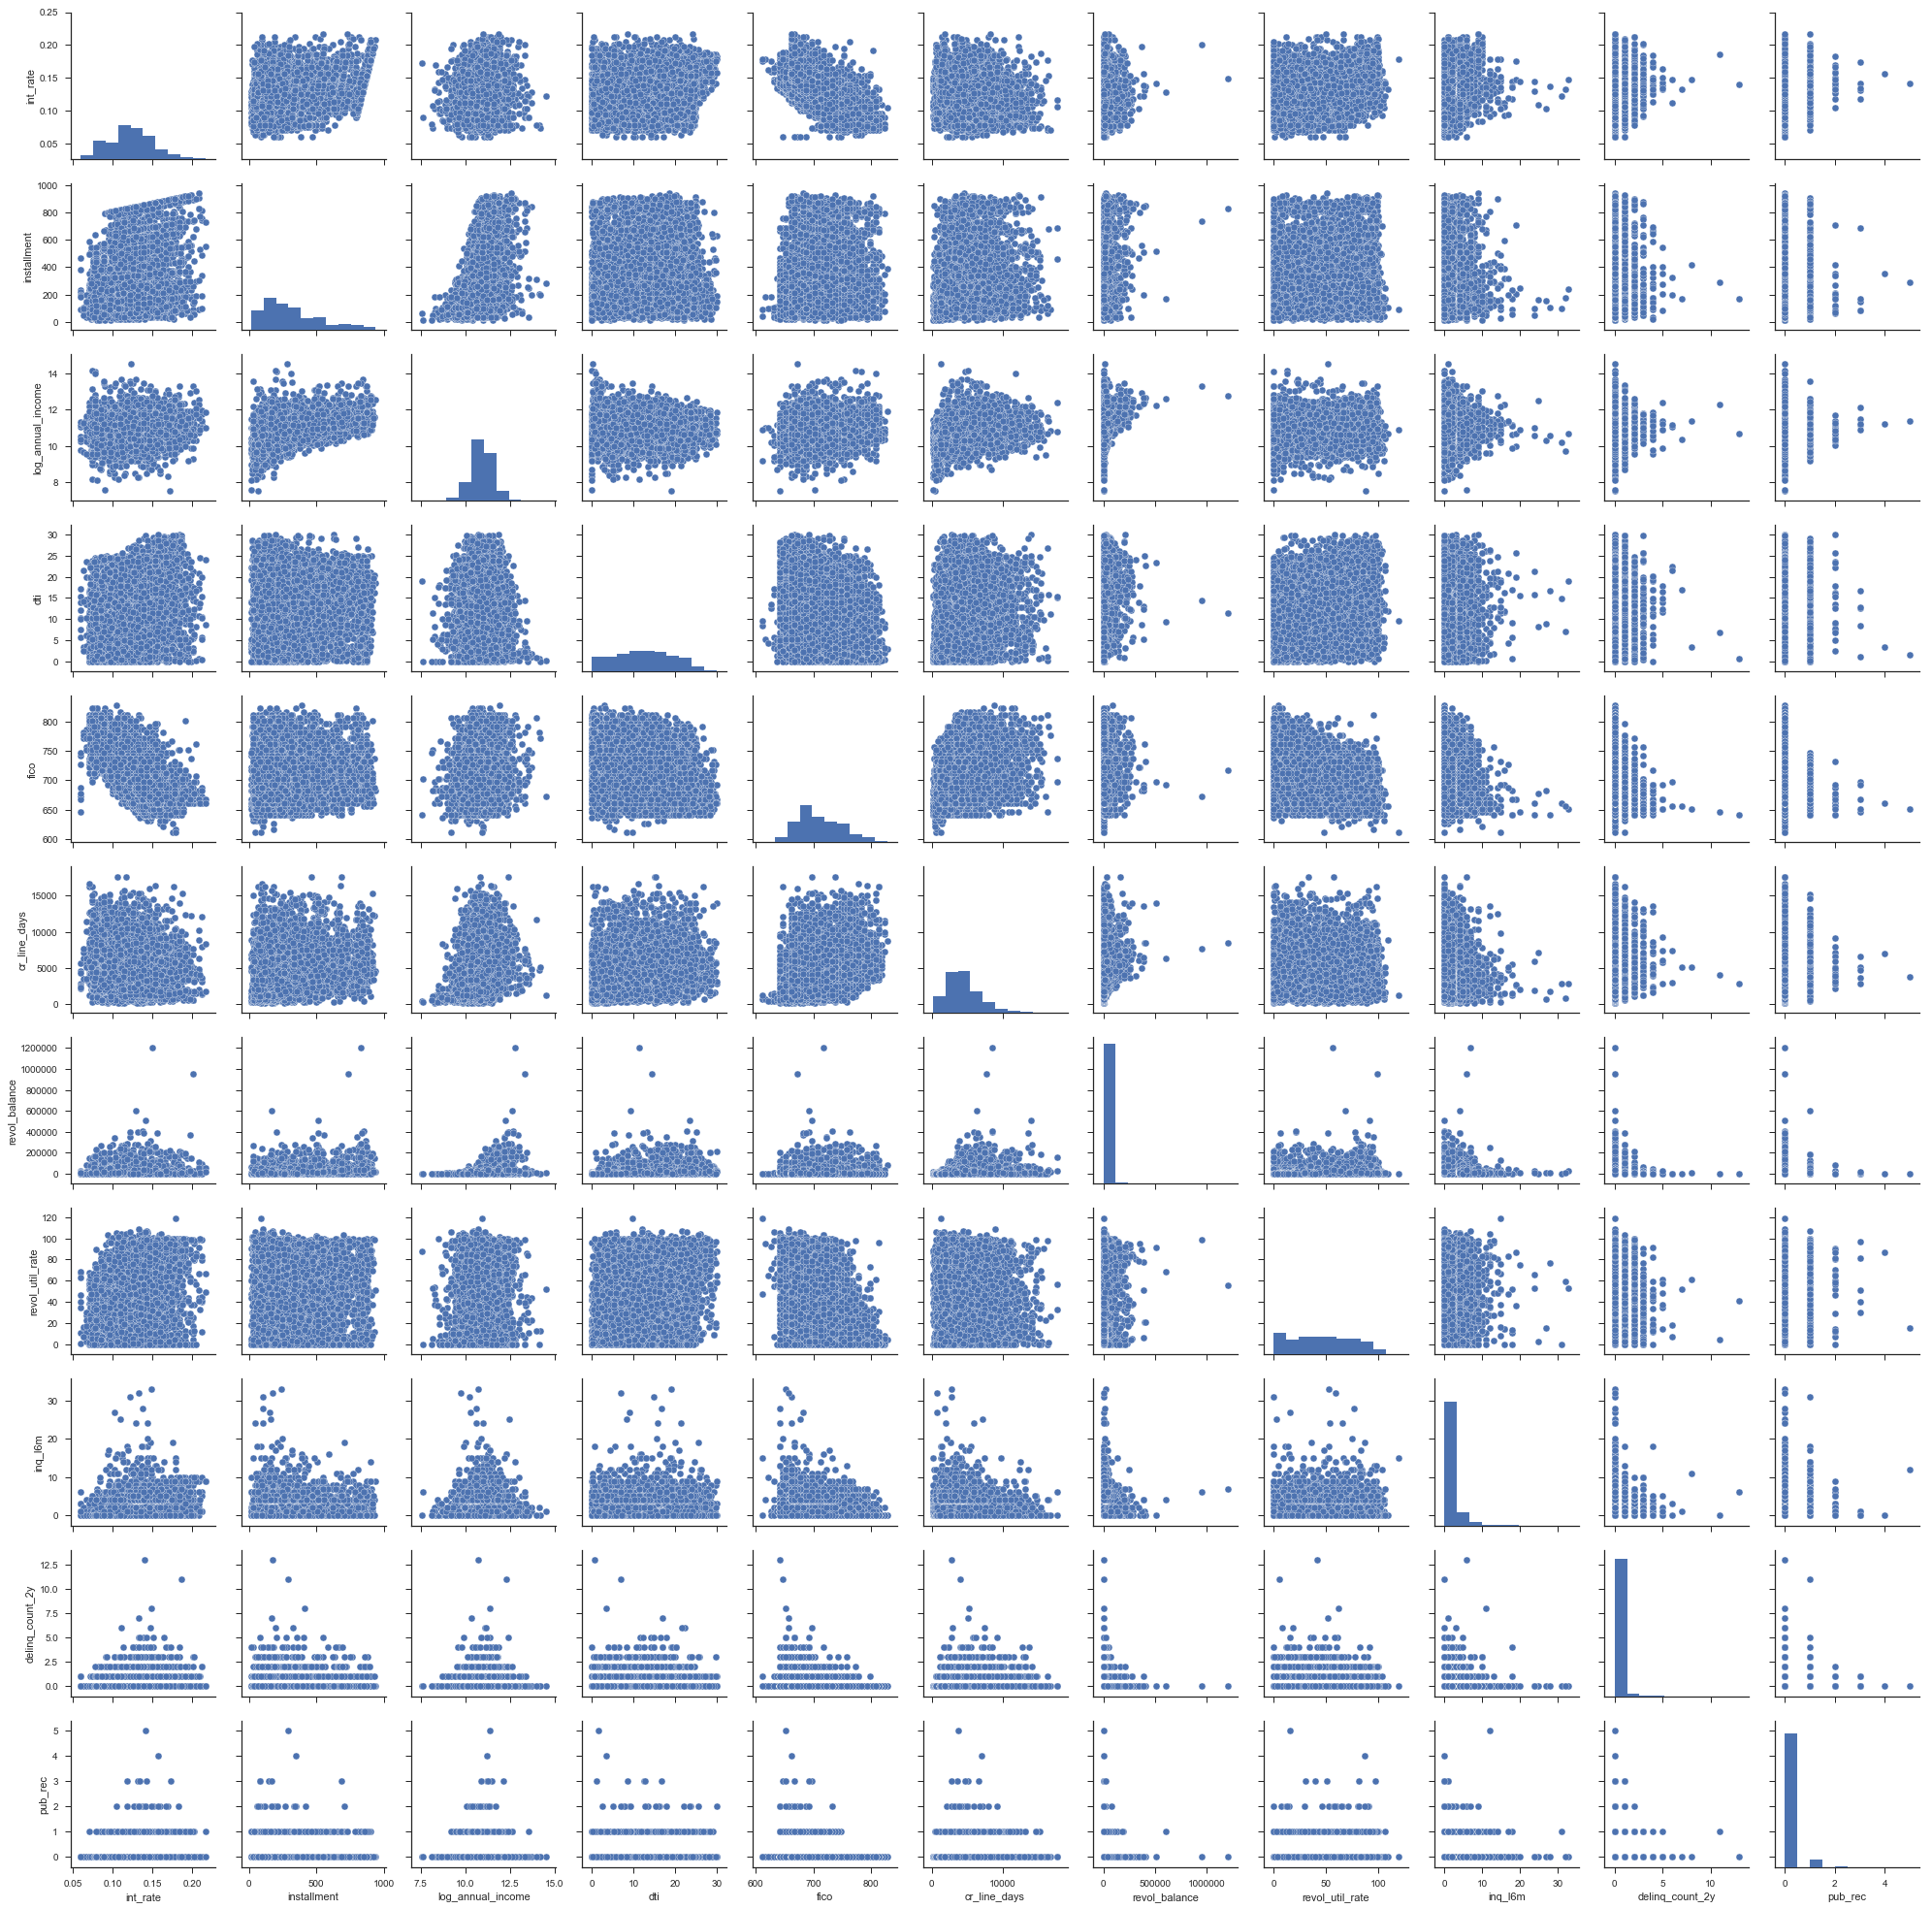

In [27]:
# Enter specific features here that you want to study:
#  You might want to do this if there's lots of features in the dataset
l_features = ['int_rate',
             'installment',
             'log_annual_income',
             'dti',
             'fico',
             'cr_line_days',
             'revol_balance',
             'revol_util_rate',
             'inq_l6m',
             'delinq_count_2y',
             'pub_rec']

sns.set(style="ticks", color_codes=True)
chart_data = data[l_features]
g = sns.pairplot( chart_data )

### 4. Data Wrangling
from EDA above, we can apply some **transformation**, **feature engineering**, or even some **normalization**

### 5. Train the Model
* selection your model with the help of this [sk-learn flowchat](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)